In [ ]:
import pandas as pd

Elaina Manalac & Jacob Manzella

In [ ]:
df = pd.read_csv('Navitas Energy.csv')
df.head()

,Generator Name,Power Project Type,Capacity (MW),Owner,Power Project Status,Operational Status,Price Point Name,Battery Type,Capex (Million USD),Capex Per Watt ($/W),...,Transmission Owner,Low Income Communities,Lease Area (Acres),Detailed Status,Interconnection Cost System Upgrade ($),Interconnection Cost System Upgrade ($/W),ISO,NPV (Million USD),Regulatory Status,Reported First Power Date
0,Winter: IC 2,Oil,2.8,North Central Power Co Inc,Operating,1.0,NSP.NCPLOAD,NaN,NaN,NaN,...,North Central Power Co Inc,False,NaN,Operating,NaN,NaN,MISO,NaN,Regulated,8/1/02
1,West County Energy Center: 2ST,Natural Gas,527.0,Florida Power & Light Co,Operating,1.0,Florida,NaN,NaN,NaN,...,Florida Power & Light Co,False,NaN,Operating,NaN,NaN,Non-ISO,NaN,Regulated,11/1/09
2,Dynegy Morro Bay: 2,Natural Gas,169.1,Luminant,Retired,NaN,MORROBAY_2_B1,NaN,NaN,NaN,...,NaN,False,NaN,Retired,NaN,NaN,CAISO,NaN,NaN,10/1/55
3,Motiva Enterprises Port Arthur Refinery: GN33,Natural Gas,25.5,Motiva,Operating,1.0,EES.MOTIVA_GEN,NaN,NaN,NaN,...,Entergy,False,NaN,Operating,NaN,NaN,MISO,NaN,Not-Regulated,6/1/78
4,Wanapum: 5,Hydro,103.8,PUD No 2 of Grant County,Retired,NaN,SHB_GNODETTL,NaN,NaN,NaN,...,PUD No 2 of Grant County (WA),False,NaN,Retired,NaN,NaN,Non-ISO,NaN,Regulated,9/1/63


In [ ]:
# Count unique values in the "Power Project Status" column
unique_counts = df['Power Project Status'].value_counts()

# Display the result
print(unique_counts)


Power Project Status
Operating             27758
Studies Undergoing     8540
Retired                7504
Pre-Study              3318
In Construction        1692
IA Executed            1057
Suspended               653
Inactive                151
Name: count, dtype: int64


In [ ]:
# Create a new column where 1 indicates 'Operating' and 0 for everything else
df['Operating_Status'] = (df['Power Project Status'] == 'Operating').astype(int)

# Display the first few rows to check
print(df.head())


                                  Generator Name Power Project Type  \
0                                   Winter: IC 2                Oil   
1                 West County Energy Center: 2ST        Natural Gas   
2                            Dynegy Morro Bay: 2        Natural Gas   
3  Motiva Enterprises Port Arthur Refinery: GN33        Natural Gas   
4                                     Wanapum: 5              Hydro   

   Capacity (MW)                       Owner Power Project Status  \
0            2.8  North Central Power Co Inc            Operating   
1          527.0    Florida Power & Light Co            Operating   
2          169.1                    Luminant              Retired   
3           25.5                      Motiva            Operating   
4          103.8    PUD No 2 of Grant County              Retired   

  Price Point Name Battery Type  Capex (Million USD)  Capex Per Watt ($/W)  \
0      NSP.NCPLOAD          NaN                  NaN                   NaN   
1 

In [ ]:
# Count the occurrences of 1 and 0 in the new column
counts = df['Operating_Status'].value_counts()

# Display the counts
print(counts)


Operating_Status
1    27758
0    22915
Name: count, dtype: int64


In [ ]:
df['Power Project Type'].unique()

array(['Oil', 'Natural Gas', 'Hydro', 'Wind', 'Solar', 'Storage',
       'Landfill Gas', 'Coal', 'Biomass', 'Waste', 'Geothermal', 'Other',
       'Nuclear', 'Hydrogen'], dtype=object)

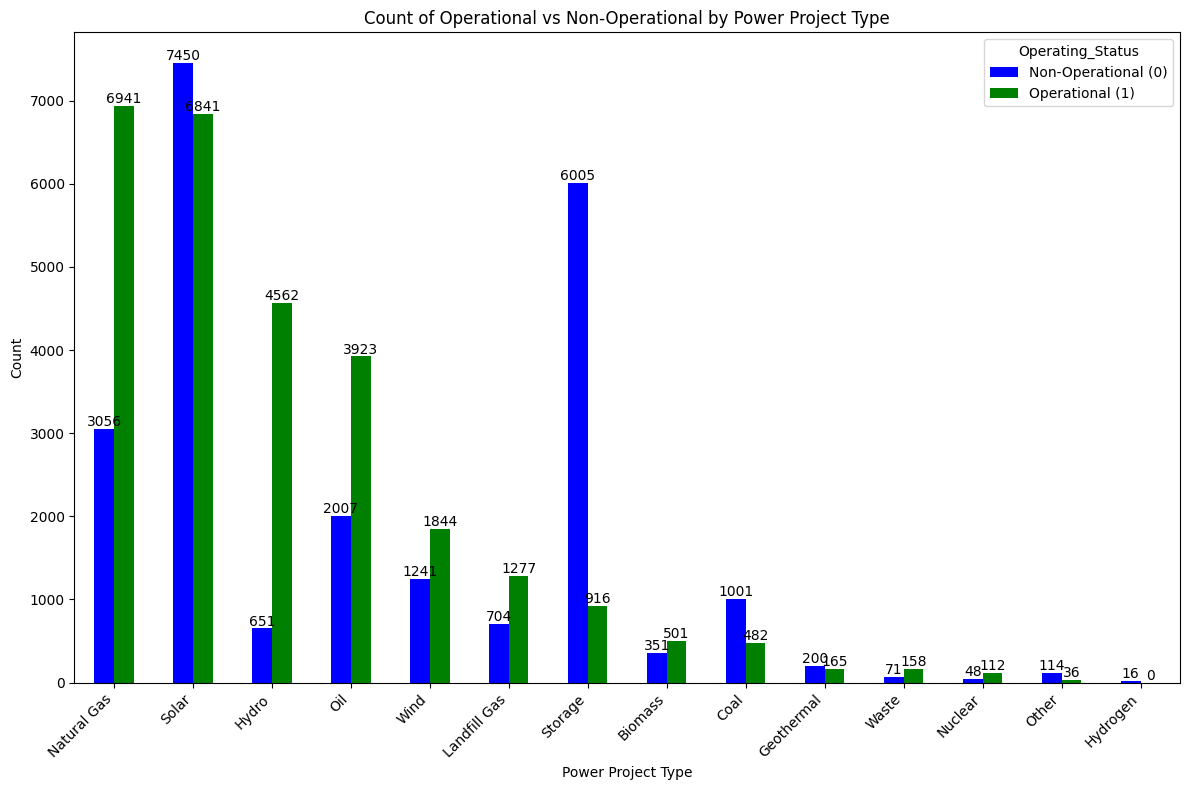

In [ ]:
# Group by 'Power Project Type' and 'Operating Status', then count occurrences
status_counts = df.groupby(['Power Project Type', 'Operating_Status']).size().unstack(fill_value=0)

# Sort the DataFrame by the count of 'Operational' projects (Operating_Status == 1) in descending order
status_counts_sorted = status_counts.sort_values(by=1, ascending=False)

# Create the bar chart
ax = status_counts_sorted.plot(kind='bar', figsize=(12, 8), stacked=False, color=['blue', 'green'])

# Customize the chart
plt.title('Count of Operational vs Non-Operational by Power Project Type')
plt.xlabel('Power Project Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Operating_Status', labels=['Non-Operational (0)', 'Operational (1)'])

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()


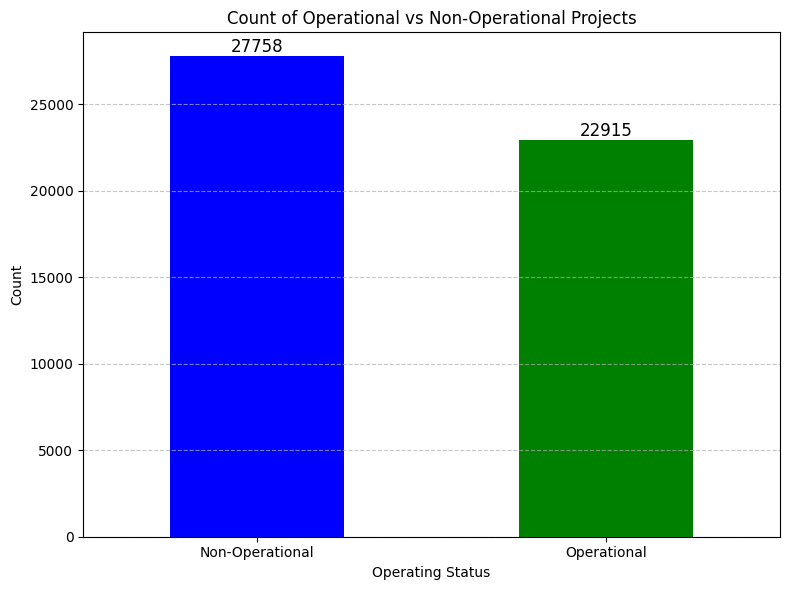

In [ ]:
# Count the occurrences of each value in the 'Operating_Status' column
status_counts = df['Operating_Status'].value_counts()

# Create the bar chart
ax = status_counts.plot(kind='bar', figsize=(8, 6), color=['blue', 'green'])

# Customize the chart
plt.title('Count of Operational vs Non-Operational Projects')
plt.xlabel('Operating Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Operational', 'Operational'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels
for i, count in enumerate(status_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
# Assuming your DataFrame is named df
unique_values = df['Power Project Status'].value_counts()

# Display the top 10 unique counts
top_10_unique_values = unique_values.head(15)
print(top_10_unique_values)

Power Project Status
Operating             27758
Studies Undergoing     8540
Retired                7504
Pre-Study              3318
In Construction        1692
IA Executed            1057
Suspended               653
Inactive                151
Name: count, dtype: int64


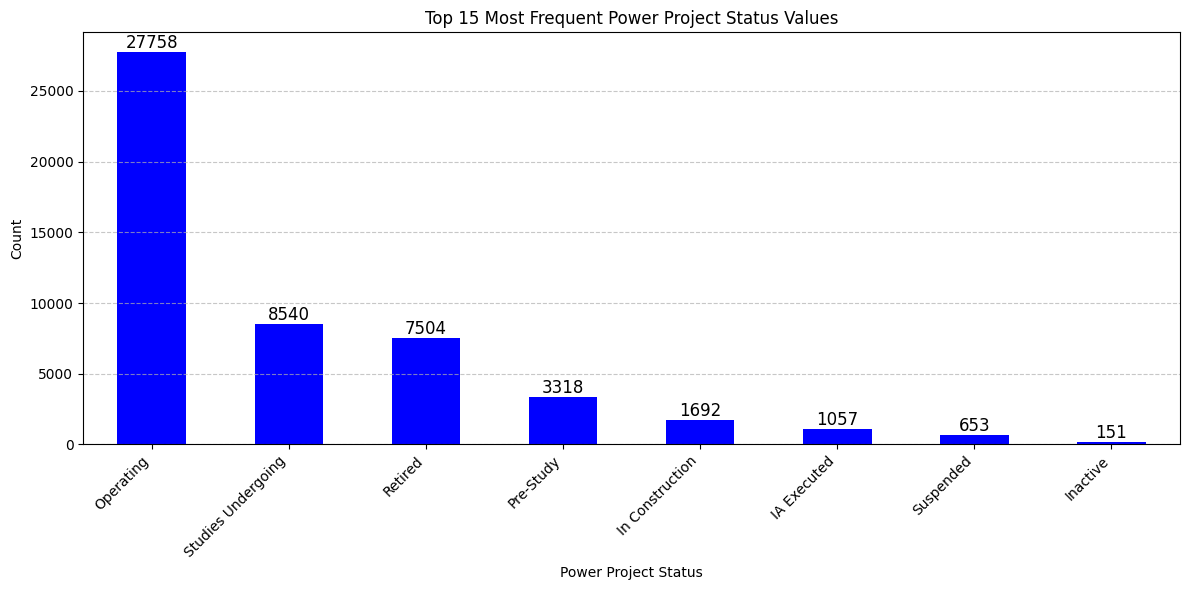

In [ ]:
# Assuming your DataFrame is named df
unique_values = df['Power Project Status'].value_counts()

# Get the top 15 unique values
top_15_unique_values = unique_values.head(15)

# Create the bar chart
ax = top_15_unique_values.plot(kind='bar', figsize=(12, 6), color='blue')

# Add data labels
for i, count in enumerate(top_15_unique_values):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

# Customize the chart
plt.title('Top 15 Most Frequent Power Project Status Values')
plt.xlabel('Power Project Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


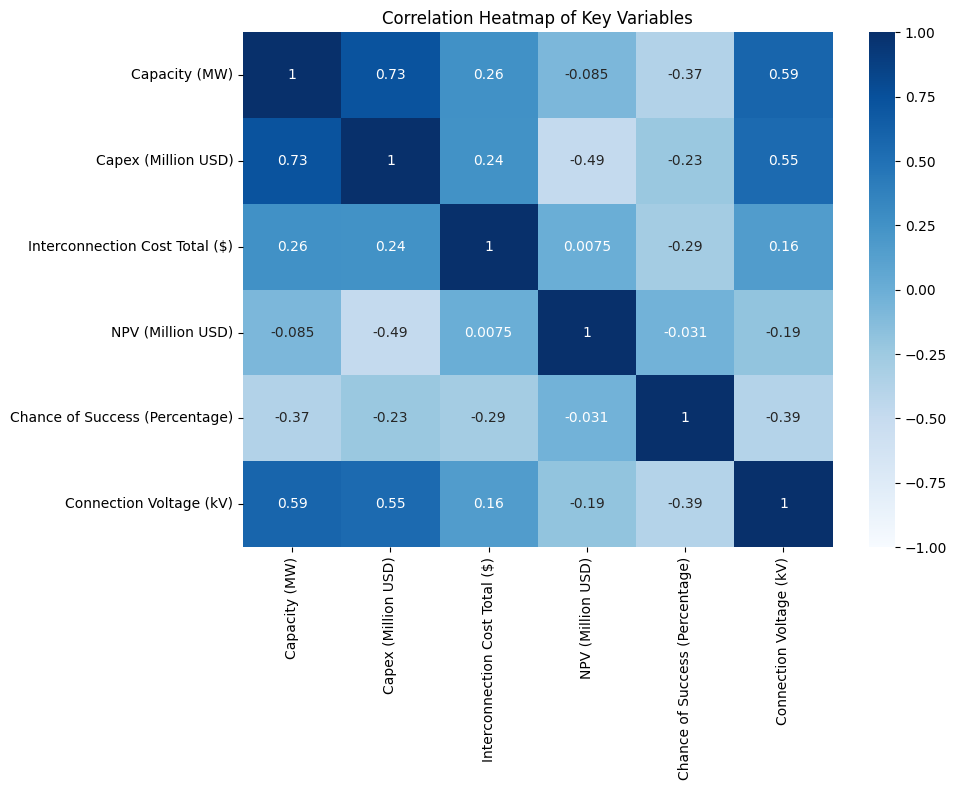

In [ ]:
# Select relevant columns
columns_of_interest = [
    'Capacity (MW)', 'Capex (Million USD)',
    'Interconnection Cost Total ($)', 'NPV (Million USD)',
    'Chance of Success (Percentage)', 'Connection Voltage (kV)'
]
# Calculate the correlation matrix
corr_matrix = df[columns_of_interest].corr()

# Set the figure size
plt.figure(figsize=(10, 8))
# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, center=0)
# Set the title
plt.title('Correlation Heatmap of Key Variables')
# Display the plot
plt.tight_layout()
plt.show()



In [ ]:
# Create high-level categories
status_categories = {
    'Operational': ['Operating', 'Standby/Backup', 'In Progress', 'FS In Progress'],
    'Construction/Development': ['In Construction', 'Pre-Study', 'Study', 'Study Not Started'],
    'Retired/Inactive': ['Retired', 'Out of Service (long term)', 'Suspended', 'DISIS STAGE'],
}

def categorize_status(status):
    for category, statuses in status_categories.items():
        if status in statuses:
            return category
    return 'Other'

df['Status Category'] = df['Detailed Status'].apply(categorize_status)
category_counts = df['Status Category'].value_counts()

print(category_counts)


Status Category
Operational                 30037
Other                        9505
Retired/Inactive             8305
Construction/Development     2826
Name: count, dtype: int64


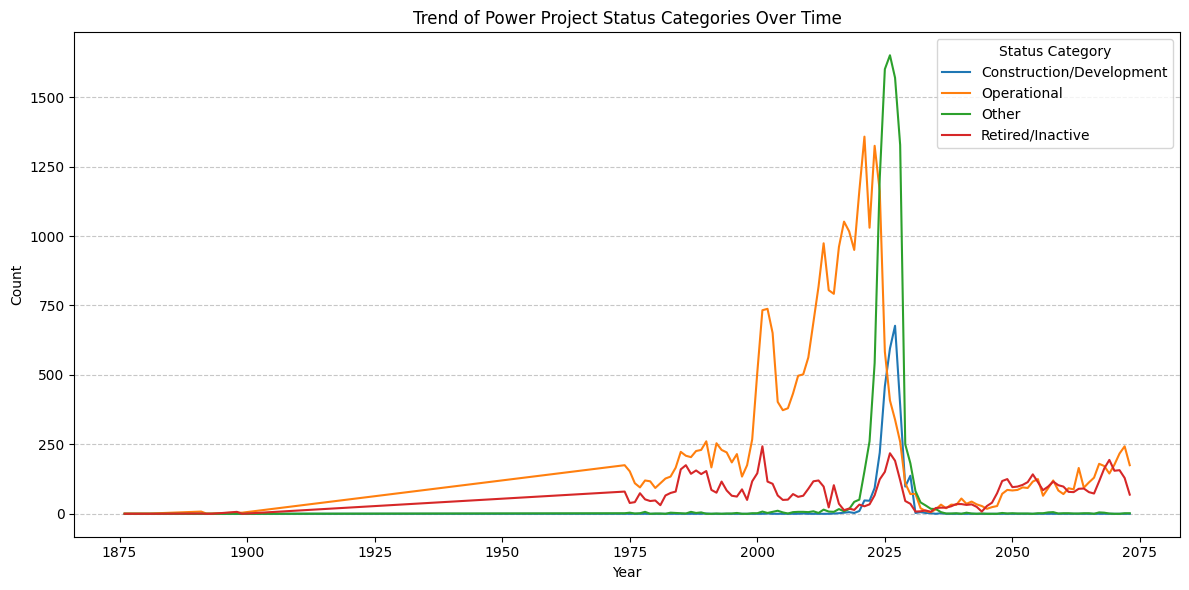

In [ ]:
# Create high-level categories
status_categories = {
    'Operational': ['Operating', 'Standby/Backup', 'In Progress', 'FS In Progress'],
    'Construction/Development': ['In Construction', 'Pre-Study', 'Study', 'Study Not Started'],
    'Retired/Inactive': ['Retired', 'Out of Service (long term)', 'Suspended', 'DISIS STAGE'],
}

def categorize_status(status):
    for category, statuses in status_categories.items():
        if status in statuses:
            return category
    return 'Other'

# Assuming your DataFrame is named df
df['Status Category'] = df['Detailed Status'].apply(categorize_status)

# Convert 'Reported First Power Date' to datetime if it's not already
df['Reported First Power Date'] = pd.to_datetime(df['Reported First Power Date'])

# Extract the year from 'Reported First Power Date'
df['Year'] = df['Reported First Power Date'].dt.year

# Group by year and 'Status Category', then count the occurrences
status_trends = df.groupby(['Year', 'Status Category']).size().unstack().fillna(0)

# Plot the trend of 'Status Category' over time
status_trends.plot(kind='line', figsize=(12, 6))

# Customize the chart
plt.title('Trend of Power Project Status Categories Over Time')
plt.ylabel('Count')
plt.xlabel('Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-44-83be9597ae14>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_10_statuses.index, rotation=45, ha='right')


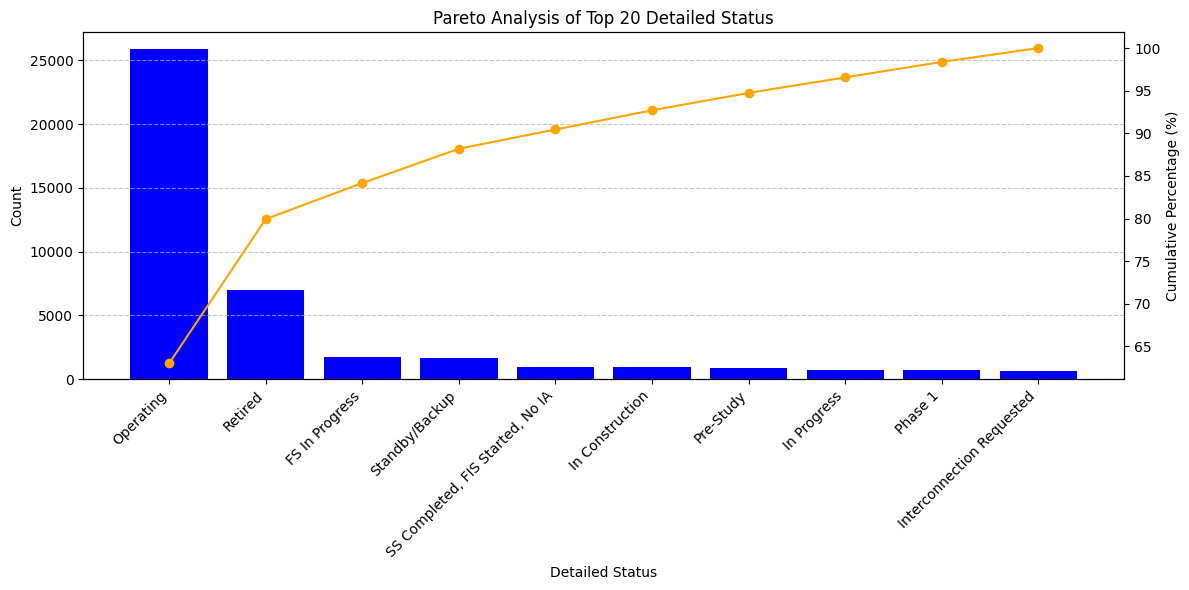

In [ ]:
# Assuming df is your DataFrame
status_counts = df['Detailed Status'].value_counts()

# Get the top 20 statuses
top_10_statuses = status_counts.head(10)

# Calculate cumulative percentage for the top 20
status_counts_cum = top_10_statuses.cumsum() / top_10_statuses.sum() * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for the count of each status
ax1.bar(top_10_statuses.index, top_10_statuses.values, color='blue', label='Status Count')
ax1.set_xlabel('Detailed Status', color='black')
ax1.set_ylabel('Count', color='black')
ax1.tick_params(axis='x', labelcolor='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(top_10_statuses.index, rotation=45, ha='right')

# Line chart for the cumulative percentage
ax2 = ax1.twinx()  # Create a second y-axis
ax2.plot(top_10_statuses.index, status_counts_cum, color='orange', marker='o', label='Cumulative Percentage')
ax2.set_ylabel('Cumulative Percentage (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add title and grid
plt.title('Pareto Analysis of Top 20 Detailed Status', color='black')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


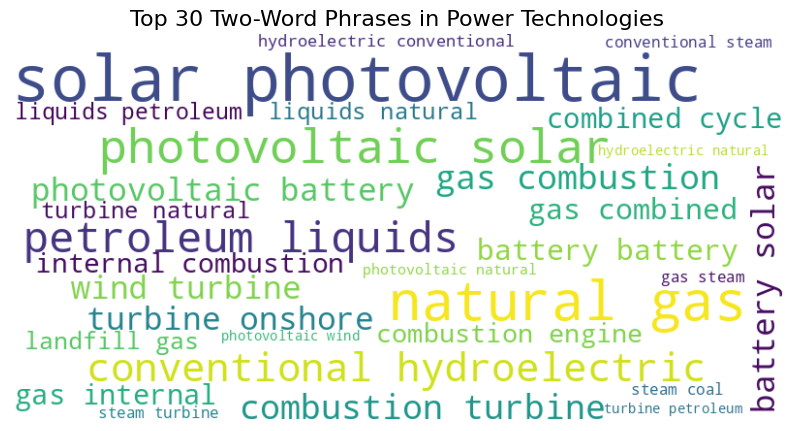

In [ ]:
# Ensure you have the necessary NLTK data
nltk.download('stopwords')

# Clean the 'Power Technology Type' column
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
    else:
        text = ''
    return text

df['Cleaned_Power_Technology'] = df['Power Technology Type'].apply(clean_text)

# Tokenize the cleaned text and remove stopwords
stop_words = set(stopwords.words('english'))
tokenized_words = []

for row in df['Cleaned_Power_Technology']:
    tokens = row.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    tokenized_words.extend(filtered_tokens)

# Generate bi-grams
bi_grams = [f"{tokenized_words[i]} {tokenized_words[i + 1]}" for i in range(len(tokenized_words) - 1)]

# Count the frequency of each bi-gram
bi_gram_counts = Counter(bi_grams)

# Select the top 30 bi-grams
top_30_bigrams = bi_gram_counts.most_common(30)

# Create a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_30_bigrams))

# Display the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 30 Two-Word Phrases in Power Technologies", fontsize=16)
plt.show()


In [ ]:
# Ensure you have the necessary NLTK data
nltk.download('stopwords')


# Clean the 'Power Technology Type' column
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
    else:
        text = ''
    return text

df['Cleaned_Power_Technology'] = df['Power Technology Type'].apply(clean_text)

# Tokenize the cleaned text and remove stopwords
stop_words = set(stopwords.words('english'))
tokenized_words = []

for row in df['Cleaned_Power_Technology']:
    tokens = row.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    tokenized_words.extend(filtered_tokens)

# Generate bi-grams
bi_grams = [f"{tokenized_words[i]} {tokenized_words[i + 1]}" for i in range(len(tokenized_words) - 1)]

# Count the frequency of each bi-gram
bi_gram_counts = Counter(bi_grams)

# Select the top 30 bi-grams
top_30_bigrams = bi_gram_counts.most_common(30)

# Create a DataFrame to display the results
top_30_bigrams_df = pd.DataFrame(top_30_bigrams, columns=['Two-Word Phrase', 'Frequency'])

# Display the DataFrame
print(top_30_bigrams_df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


               Two-Word Phrase  Frequency
0           solar photovoltaic      14329
1                  natural gas      10003
2           photovoltaic solar       7327
3            petroleum liquids       5937
4   conventional hydroelectric       5213
5               gas combustion       3616
6           combustion turbine       3616
7                battery solar       3104
8         photovoltaic battery       3102
9                 wind turbine       3080
10             turbine onshore       3010
11             battery battery       2434
12                gas combined       2390
13              combined cycle       2390
14                gas internal       2332
15         internal combustion       2332
16           combustion engine       2332
17                landfill gas       1981
18             turbine natural       1859
19             liquids natural       1819
20           liquids petroleum       1800
21  hydroelectric conventional       1741
22          conventional steam    

In [ ]:
# Create a subset with 'Capex Per Watt ($/W)' and 'Successful Operation', dropping NaN values
subset = df[['Capex Per Watt ($/W)', 'Operating_Status']].dropna()

# Define the feature and target
X = subset[['Capex Per Watt ($/W)']]  # Feature
y = subset['Operating_Status']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9151245990624229
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2221
           1       0.92      0.89      0.90      1832

    accuracy                           0.92      4053
   macro avg       0.92      0.91      0.91      4053
weighted avg       0.92      0.92      0.91      4053



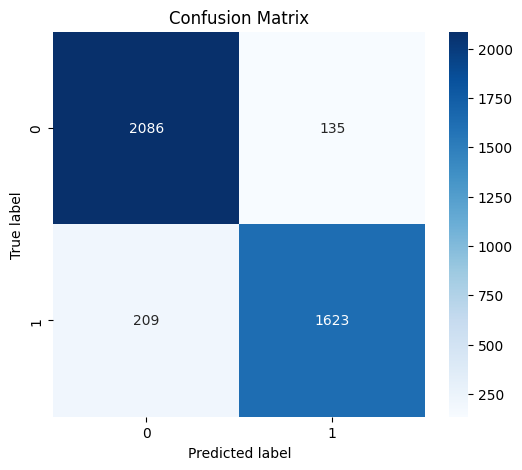

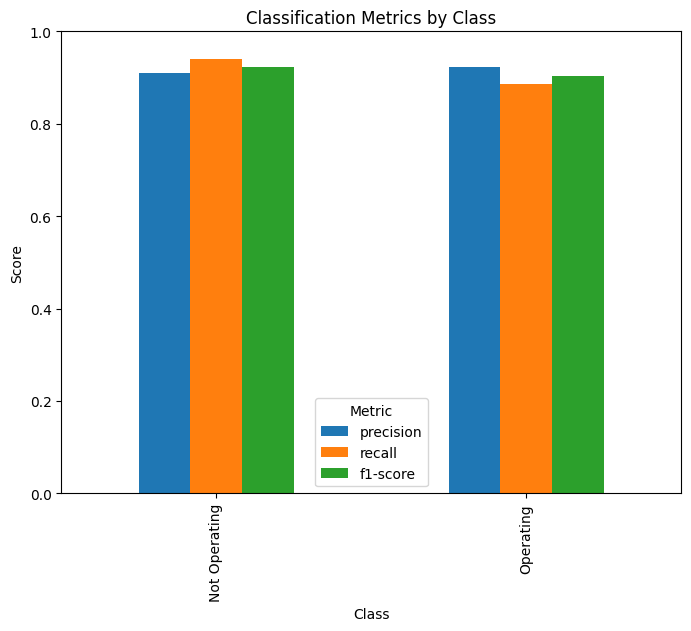

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Extract precision, recall, and f1-score from classification report
report = classification_report(y_test, y_pred, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']

# Create a bar plot for precision, recall, and F1-score
metrics_data = {metric: [report[cls][metric] for cls in classes] for metric in metrics}
metrics_df = pd.DataFrame(metrics_data, index=['Not Operating', 'Operating'])

metrics_df.plot(kind='bar', figsize=(8, 6))
plt.title('Classification Metrics by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.show()


Class 0 (Unsuccessful): Mean = 1.33, Median = 1.22
Class 1 (Successful): Mean = 2.68, Median = 2.33


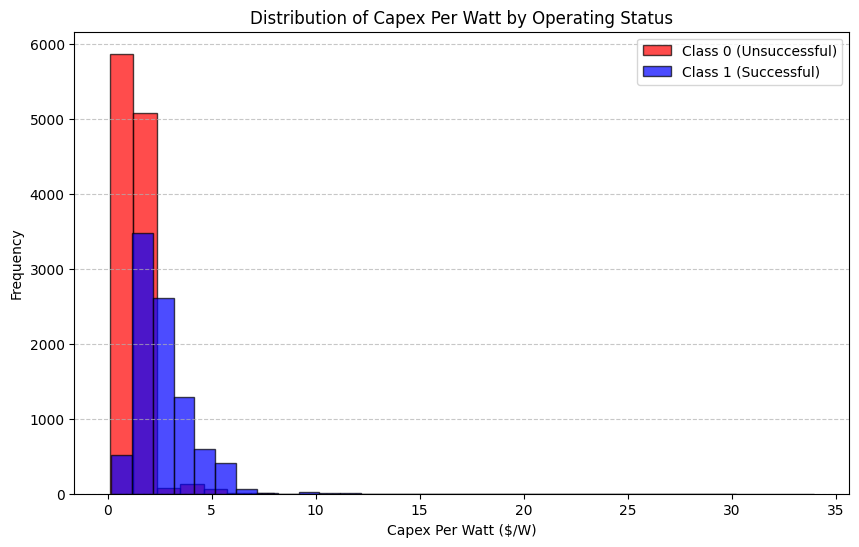

In [ ]:
# Split the data into two groups based on 'Operating_Status'
class_0 = subset[subset['Operating_Status'] == 0]['Capex Per Watt ($/W)']
class_1 = subset[subset['Operating_Status'] == 1]['Capex Per Watt ($/W)']

# Calculate mean and median for each group
mean_0 = class_0.mean()
median_0 = class_0.median()
mean_1 = class_1.mean()
median_1 = class_1.median()

print(f"Class 0 (Unsuccessful): Mean = {mean_0:.2f}, Median = {median_0:.2f}")
print(f"Class 1 (Successful): Mean = {mean_1:.2f}, Median = {median_1:.2f}")

# Plot distribution of Capex per Watt for both groups
plt.figure(figsize=(10, 6))
plt.hist(class_0, bins=30, alpha=0.7, label='Class 0 (Unsuccessful)', color='red', edgecolor='black')
plt.hist(class_1, bins=30, alpha=0.7, label='Class 1 (Successful)', color='blue', edgecolor='black')
plt.title("Distribution of Capex Per Watt by Operating Status")
plt.xlabel("Capex Per Watt ($/W)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


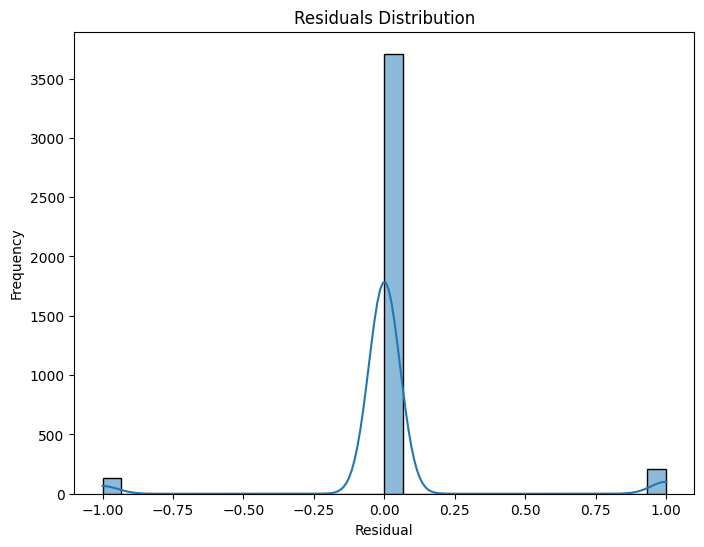

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2221
           1       0.94      0.92      0.93      1832

    accuracy                           0.93      4053
   macro avg       0.93      0.93      0.93      4053
weighted avg       0.93      0.93      0.93      4053



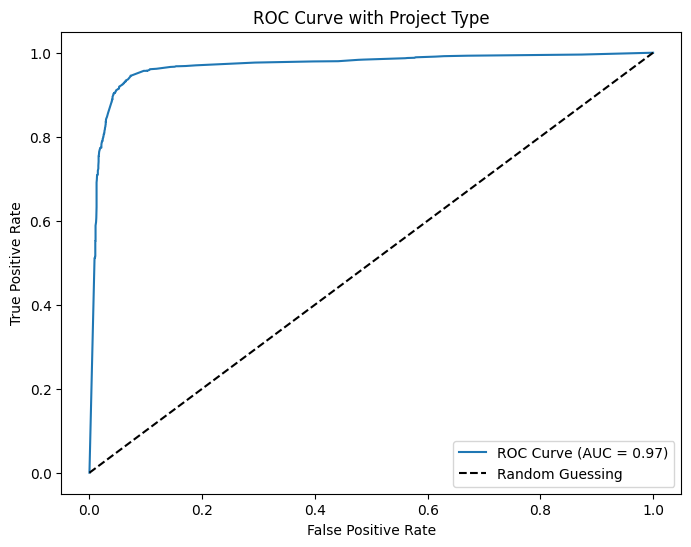

In [ ]:
# Subset the required columns and drop NAs
subset = df[['Capex Per Watt ($/W)', 'Operating_Status', 'Power Project Type']].dropna()

# One-hot encode the 'Power Project Type' variable
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
project_type_encoded = encoder.fit_transform(subset[['Power Project Type']])

# Create a DataFrame for the encoded columns
encoded_columns = pd.DataFrame(project_type_encoded, columns=encoder.get_feature_names_out(['Power Project Type']))
subset = pd.concat([subset.reset_index(drop=True), encoded_columns], axis=1)

# Define features (including one-hot encoded columns) and target
X = subset.drop(columns=['Operating_Status', 'Power Project Type'])
y = subset['Operating_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_probs = model.predict_proba(X_test)[:, 1]  # Probability for the positive class (1)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate and plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.title('ROC Curve with Project Type')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

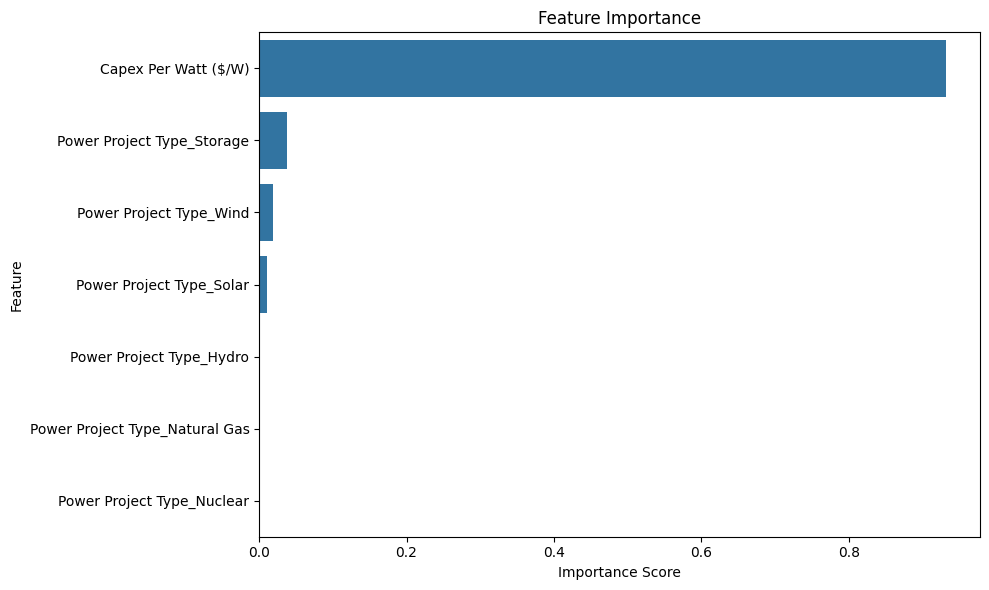

In [ ]:
# Get the feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Operating_Status
0    11248
1     9015
Name: count, dtype: int64


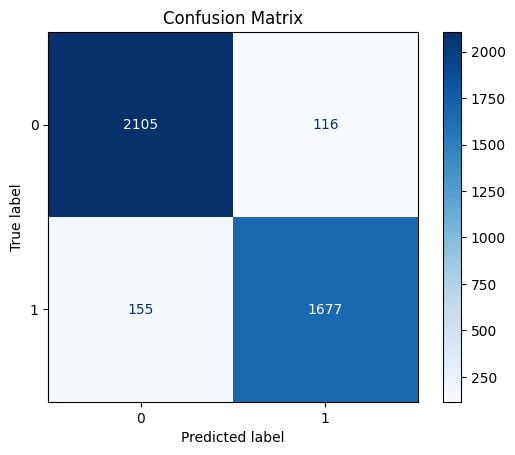

In [ ]:
# Count the total occurrences of each value in 'Successful Operation' within the subset
success_counts = subset['Operating_Status'].value_counts()

# Display the counts
print(success_counts)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()